In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

### Check logistic curve:

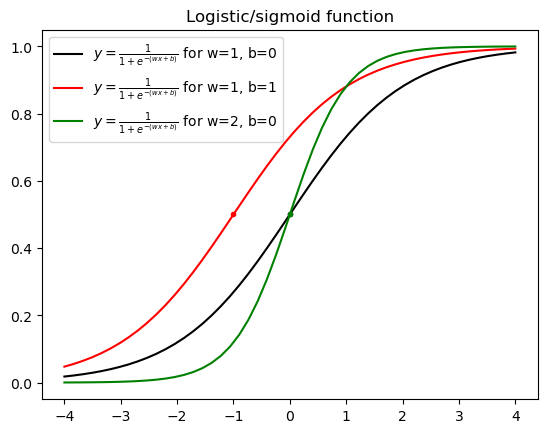

In [2]:
low = -4
high = 4
xplot = np.linspace(start=low, stop=high)

w = 1
b = 0
yplot = 1 / (1 + np.exp(-(w * xplot + b)))
plt.plot(xplot, yplot, '-', color='black',
         label=f'$y = \\frac{{1}}{{1 + e^{{-(w x + b)}}}}$ for w={w}, b={b}')
plt.plot(-b / w, 1/2, '.', color='black')
plt.title('Logistic/sigmoid function')

w = 1
b = 1
yplot = 1 / (1 + np.exp(-(w * xplot + b)))
plt.plot(xplot, yplot, '-', color='red',
         label=f'$y = \\frac{{1}}{{1 + e^{{-(w x + b)}}}}$ for w={w}, b={b}')
plt.plot(-b / w, 1/2, '.', color='red')

w = 2
b = 0
yplot = 1 / (1 + np.exp(-(w * xplot + b)))
plt.plot(xplot, yplot, '-', color='green',
         label=f'$y = \\frac{{1}}{{1 + e^{{-(w x + b)}}}}$ for w={w}, b={b}')
plt.plot(-b / w, 1/2, '.', color='green')

_ = plt.legend()


### Toy example:

intercept=[-9.61109689e-08], slope=[5.80132264], training score=0.75
predictions for X=[[-1]
 [ 0]
 [ 0]
 [ 1]] and y=[0 0 1 1] are y_hat=[0 0 0 1]
probs:
[0.00301444 0.49999998 0.49999998 0.99698556]


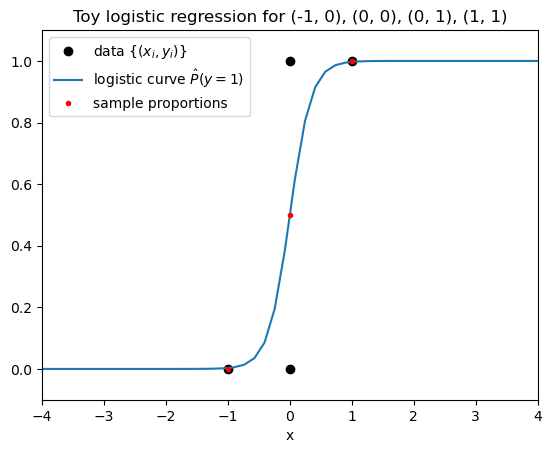

In [8]:
X = np.array([-1, 0, 0, 1]).reshape(-1, 1) # need 2D for .fit() below
y = np.array([0, 0, 1, 1])
N = y.shape[0]
model = linear_model.LogisticRegression(C=1000)
# First try commenting out next three lines and setting b and w by eye.
# Also try varying C, above.
model.fit(X, y)
b = model.intercept_
w = model.coef_[0]
print(f'intercept={b}, slope={w}, training score={model.score(X, y)}')
print(f'predictions for X={X} and y={y} are y_hat={model.predict(X)}')

# plot data
plt.plot(X, y, 'o', color='black', label=r'data $\{(x_i, y_i)\}$')
plt.title('Toy logistic regression for (-1, 0), (0, 0), (0, 1), (1, 1)')
plt.xlabel('x')
plt.xlim(low, high)
margin = 0.1
plt.ylim(-(0 + margin), 1 + margin)

# plot curve
xplot = np.linspace(start=low, stop=high)
yplot = 1 / (1 + np.exp(-(w * xplot + b)))
plt.plot(xplot, yplot, label=r'logistic curve $\hat{P}(y = 1)$')

# find and plot sample proportions
x_values, x_counts = np.unique(X, return_counts=True)
n_x_values = x_values.shape[0]
success_proportion_per_x_value = np.zeros(n_x_values)
for i in np.arange(n_x_values):
    success_proportion_per_x_value[i] = np.sum(y[X[:, 0] == x_values[i]]) / x_counts[i]

probs = model.predict_proba(X)[:, 1] # column 1 is P(y_i = 1); column 0 is P(y_i = 0)
print('probs:')
print(probs)
plt.plot(x_values, success_proportion_per_x_value, '.', color='red',
         label='sample proportions')

plt.legend()
plt.savefig('toyLogistic.png')


### 1D x real data example on NFL field-goal attempts.


,kick_distance,field_goal_result
0,34.0,blocked
1,22.0,made
2,46.0,made
3,25.0,made
4,52.0,made


intercept=[6.00563466], slope=[-0.10485073], training score=0.8452054794520548


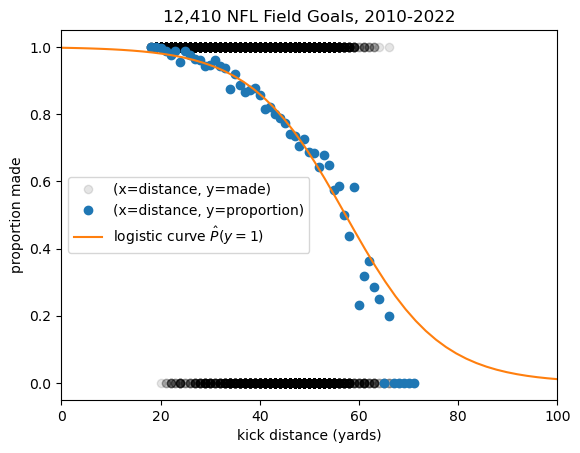

In [6]:
df = pd.read_csv('http://www.stat.wisc.edu/~jgillett/451/data/field_goals.csv')
display(df.head())
model = linear_model.LogisticRegression(C=1000)
X = df[['kick_distance']]
y = (df.field_goal_result == 'made')
model.fit(X, y)
b = model.intercept_
w = model.coef_[0]
print(f'intercept={b}, slope={w}, training score={model.score(X, y)}')
#print(f'predictions for X={X} and y={y} are y_hat={model.predict(X)}')

sample_proportion_made = np.zeros(100)
min_distance = int(np.min(df.kick_distance))
max_distance = int(np.max(df.kick_distance))
for i in range(100):
    df_i = df[df.kick_distance == i]
    if df_i.shape[0] == 0:
        sample_proportion_made[i] = 0
    else:
        sample_proportion_made[i] = np.sum(df_i.field_goal_result == 'made') / df_i.shape[0]

plt.plot(X.kick_distance, y.astype(int), 'o', color='black', alpha=.1, label=r'(x=distance, y=made)')

plt.plot(np.arange(start=np.min(df.kick_distance),
                   stop=np.max(df.kick_distance) + 1,
                   step=1),
         sample_proportion_made[min_distance:(max_distance + 1)],
         'o', label=r'(x=distance, y=proportion)')
plt.xlim((0, 100))
plt.xlabel('kick distance (yards)')
plt.ylabel('proportion made')
plt.title('12,410 NFL Field Goals, 2010-2022')

xplot = np.linspace(start=0, stop=100)
yplot = 1 / (1 + np.exp(-(w * xplot + b)))
plt.plot(xplot, yplot, label=r'logistic curve $\hat{P}(y = 1)$')
plt.legend(loc='center left')


### Here is a 2D x example to show linear decision boundary from $\mathbf{wx} + b$ part of model.

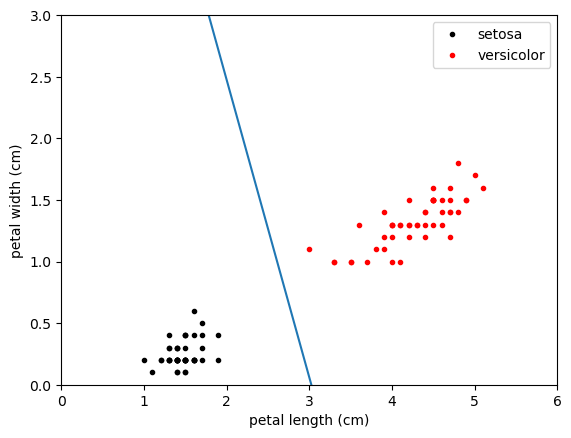

In [5]:
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True)
X = X[:, 2:4] # retain only petal length and petal width
X = X[y < 2, :] # exclude y == 2 flowers to get binary y
y = y[y < 2]
model = linear_model.LogisticRegression()
model.fit(X, y)
b = model.intercept_
w = model.coef_[0]
plt.plot(X[y == 0, 0], X[y == 0, 1], '.', color='black', label='setosa')
plt.plot(X[y == 1, 0], X[y == 1, 1], '.', color='red', label='versicolor')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.xlim(0, 6)
plt.ylim(0, 3)
x_plot = np.linspace(0, 6)
plt.plot(x_plot, -(w[0]*x_plot + b) / w[1]) # Solve for x_2 (y-coordinate) wx + b = 0 = ln(p / (1 - p)) where p = 1/2.
_ = plt.legend()
